# Introdução e preparativos

**ALUNOS:**

Daniel Augusto Muller

Gabriel Junges

Matheus Buratti

1 - Recrie os experimentos 4.1, 4.2 e 4.3 do artigo Principal component analysis - a tutorial

2 - Esse trabalho pode ser feito em grupos de até 3 pessoas

3 - Apenas 1 do grupo envia o trabalho no classroom, identificando os outros membros

4 - Compartilhar o link (no colab, botão superior direito, compartilhar, alterar opção para "qualquer um com link pode visualizar", copiar link, e colar o link aqui para verificação)

Link Trabalho: *https://github.com/dalcimar/MA28CP-Intro-to-Machine-Learning/blob/master/L09_principal%20component%20analysis/PrincipalComponentAnalysis-ATutorial%20(1).pdf*

**Bibliotecas Úteis**

In [ ]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import cv2
from PIL import Image, ImageOps
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import io
import pandas as pd
from sklearn import datasets
import zipfile
import os
import glob
from timeit import default_timer as timer
from math import ceil
from IPython.display import HTML

## **Importando os Datasets (ORL, Ear e Yale) do GitHub**

In [ ]:
!wget -q https://github.com/GJunges1/Datasets-PCA/raw/master/EAR.zip # baixando zip
!unzip -nq /content/EAR.zip -d /tmp/EAR # extraindo arquivos na pasta /tmp

!wget -q https://github.com/GJunges1/Datasets-PCA/raw/master/ORL.zip # baixando zip
!unzip -nq /content/ORL.zip -d /tmp/ORL # extraindo arquivos na pasta /tmp

!wget -q https://github.com/GJunges1/Datasets-PCA/raw/master/YALE.zip # baixando zip
!unzip -nq /content/YALE.zip -d /tmp/YALE # extraindo arquivos na pasta /tmp

!rm EAR.zip* ORL.zip* YALE.zip* # excluindo zip's

In [ ]:
print("Tamanho dataset ORL: %d"%len(os.listdir('/tmp/ORL/'))) #410
print("Tamanho dataset EAR: %d"%len(os.listdir('/tmp/EAR/'))) #102
print("Tamanho dataset YALE: %d"%len(os.listdir('/tmp/YALE/'))) #165

Tamanho dataset ORL: 410
Tamanho dataset EAR: 102
Tamanho dataset YALE: 165


## Splitando Datasets X e y

### Dataset Iono

In [ ]:
iono_df = pd.read_csv('https://raw.githubusercontent.com/GJunges1/Datasets-PCA/master/ionosphere.csv')
iono_df['label'] = iono_df['label'].map({'b':0,'g':1}) #BAD: 0, GOOD: 1
iono_X = iono_df.iloc[:,:34].values
iono_y = iono_df.iloc[:,34].values
#iono_df

### Dataset Iris

In [ ]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
#iris.data

### Dataset EAR

Tipo de Dado: <class 'numpy.ndarray'>
Resolução: (64, 64)
Tamanho: 4096 px


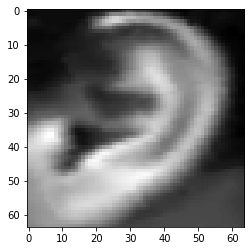

(102, 4096)
(102,)


In [ ]:
EAR_X = []
EAR_y = []

for filename in os.listdir('/tmp/EAR'):
    if filename.endswith("pgm"): 
      image = Image.open("/tmp/EAR/"+filename)
      # no artigo, as imagens deste dataset foram redimensionadas para 64x64, assim:
      image = image.resize((64,64))
      image = np.array(image)
      EAR_X.append(image.reshape(image.shape[0]*image.shape[1]))
      filename = filename[ :-len('.pgm')]
      EAR_y.append(''.join(i for i in filename if not i.isdigit()))

print("Tipo de Dado:",type(image))
print("Resolução:",image.shape)
print("Tamanho:", image.size,"px")
plt.imshow(image,cmap='gray')
plt.show()

EAR_X = np.array(EAR_X)
EAR_y = np.array(EAR_y)

EAR_d = {'alu':0,
         'ang':1,
         'ant':2,
         'ave':3,
         'ern':4,
         'iva':5,
         'jai':6,
         'jlf':7,
         'jos':8,
         'juc':9,
         'mac':10,
         'mga':11,
         'mig':12,
         'pac':13,
         'ped':14,
         'vic':15,
         'xav':16}

EAR_y = pd.DataFrame(EAR_y)[0].map(EAR_d).values
print(EAR_X.shape)
print(EAR_y.shape)

### Dataset ORL

Tipo de Dado: <class 'numpy.ndarray'>
Resolução: (80, 70)
Tamanho: 5600 px


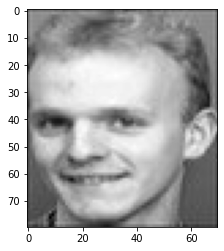

ORL_X.shape: (400, 5600) 
ORL_y.shape: (400,)

ORL_y:
 [20 37  1 40 31 31 12 38 20 30  3 27  6 22 19 26  6 40  6  6 15 13  8 38
 10 30 15 18 22 14  4  4  9 32  5 33 19 36 37 37  7  8 14 16 40 10 38 27
  4 40 39 37 14 16 24 20 21 11 14  7 33  2 18 12 22 15 29 24 20 21  2 22
 36 38 23 29  8 22 34 15 20 34 10 31 28 17 10 22 32 27 22 10 17 40  1 24
 37 17  2 34  4 16 17 32 23  3  3 12 32 25  3 21 35 16  2 17 18 23  8  9
 20 29 29 18  5 13 39  9 25 36 31  4 11 23 23 27 26 18 10 28  9 14 36 13
 38 16  1 23 14 18 19 24 39 18 21 31  4 11 39  2 35 33  8 10 31  2  9 21
  9  3  5  7 25 11 12 28 13 26 13 28 30  7  5  8 34 15 31 34 21 37 19 26
 30 26  4  1 11 18  3 25  1  3 26 36 29 13 36 11  6 15 24 29 35 27 32  7
 17  2  7 26 25 28 11  9 13  1 30 29  6 31 16 29 27 13  9 17  4 31 27 20
  5  8 24 10 19  2  7 26 31 26 39 15  1 25 29 38  8 14 33 38 35 18 19 17
 35 11 40 40 26 40 20 30 24 40 12  1 32 23  2 21 13 16 32 38 16 34 24 15
 10 12 28 23 28 36 28 27 35 33 30 14 16 14 39  6 37 39 25 19 39  2 22

In [ ]:
ORL_X = []
ORL_y = []

for filename in os.listdir('/tmp/ORL'):
    if filename.endswith("jpg") and not filename.endswith("_41.jpg"): 
      image = Image.open("/tmp/ORL/"+filename)
      image = np.array(image)
      ORL_X.append(image.reshape(image.shape[0]*image.shape[1]))
      ORL_y.append(int(filename[filename.find('_')+1:-len('.jpg')]))

print("Tipo de Dado:",type(image))
print("Resolução:",image.shape)
print("Tamanho:", image.size,"px")
plt.imshow(image,cmap='gray')
plt.show()

ORL_X = np.array(ORL_X)
ORL_y = np.array(ORL_y)
print('ORL_X.shape:',ORL_X.shape,'\nORL_y.shape:', ORL_y.shape)
print('\nORL_y:\n',ORL_y)
print('\nORL_X:\n',ORL_X)

### Dataset YALE

Tipo de Dado: <class 'numpy.ndarray'>
Resolução: (243, 320)
Tamanho: 77760 px


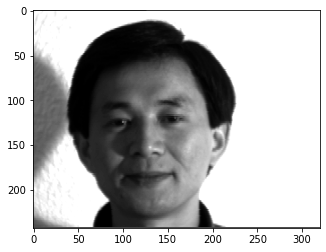

YALE_X.shape: (165, 77760) 
YALE_y.shape: (165,)


In [ ]:
YALE_X = []
YALE_y = []
prefix = 'subject'

for filename in os.listdir('/tmp/YALE'):
    image = Image.open("/tmp/YALE/"+filename)
    image = np.array(image)
    YALE_X.append(image.reshape(image.shape[0]*image.shape[1]))
    YALE_y.append(int(filename[len(prefix):filename.find('.')]))

print("Tipo de Dado:",type(image))
print("Resolução:",image.shape)
print("Tamanho:", image.size,"px")
plt.imshow(image,cmap='gray')
plt.show()

YALE_X = np.array(YALE_X)
YALE_y = np.array(YALE_y)
print('YALE_X.shape:',YALE_X.shape,'\nYALE_y.shape:', YALE_y.shape)
# print('\nYALE_y:\n',YALE_y)
# print('\nYALE_X:\n',YALE_X)

#**4.1 - Biometric Experiment - Matheus**

## Train/Test split

In [ ]:
ORL_X_train, ORL_X_test, ORL_y_train, ORL_y_test = train_test_split(ORL_X, ORL_y, test_size=0.3, shuffle=True, random_state=123, stratify=ORL_y)

YALE_X_train, YALE_X_test, YALE_y_train, YALE_y_test = train_test_split(YALE_X, YALE_y, test_size=0.3, shuffle=True, random_state=123, stratify=YALE_y)

EAR_X_train, EAR_X_test, EAR_y_train, EAR_y_test = train_test_split(EAR_X, EAR_y, test_size=0.3, shuffle=True, random_state=123, stratify=EAR_y)

## Aplicação do PCA e NN

### ORL

In [ ]:
ORL_data = np.zeros((9,3))
i = 0
for k in [1, 5, 10, 15, 20, 30, 40, 50, 100]:
  # Modelo para as k componentes
  pca = PCA(n_components=k)

  # Fit das amostras + projeção das amostras de treino
  # Resolvi seguir chamando de Y para consistência com o artigo 
  # mas o vetor y não é de rótulos.
  ORL_Y = pca.fit_transform(ORL_X_train)

  # Projeção das amostras de teste
  ORL_U = pca.transform(ORL_X_test)

  # Criando o modelo do NN
  nn_model = KNeighborsClassifier(n_neighbors=1)
  nn_model.fit(ORL_Y, ORL_y_train)

  # Calculando o tempo para o predict/fazendo o predict
  start = timer()
  y_predict = nn_model.predict(ORL_U)
  end = timer()
  
  # Guardando os resultados
  # [0] - Accuracy
  # [1] - Tempo
  # [2] - Cum. Sum.
  ORL_data[i,0] = accuracy_score(ORL_y_test, y_predict)*100
  ORL_data[i,1] = end-start
  ORL_data[i,2] = np.cumsum(pca.explained_variance_ratio_*100)[-1]

  i+=1

### EAR

In [ ]:
# Exatamente o mesmo processo mas agora para o EAR dataset
EAR_data = np.zeros((9,3))
i = 0
for k in [1, 5, 10, 15, 20, 30, 40, 50, 71]: # Aqui só vai até 71 (X.shape(0))
  # Modelo para as k componentes
  pca = PCA(n_components=k)

  # Fit das amostras + projeção das amostras de treino
  # Resolvi seguir chamando de Y para consistência com o artigo 
  # mas o vetor y não é de rótulos.
  EAR_Y = pca.fit_transform(EAR_X_train)

  # Projeção das amostras de teste
  EAR_U = pca.transform(EAR_X_test)

  # Criando o modelo do NN
  nn_model = KNeighborsClassifier(n_neighbors=1)
  nn_model.fit(EAR_Y, EAR_y_train)

  # Calculando o tempo para o predict/fazendo o predict
  start = timer()
  y_predict = nn_model.predict(EAR_U)
  end = timer()
  
  # Guardando os resultados
  # [0] - Accuracy
  # [1] - Tempo
  # [2] - Cum. Sum.
  EAR_data[i,0] = accuracy_score(EAR_y_test, y_predict)*100
  EAR_data[i,0]
  EAR_data[i,1] = end-start
  EAR_data[i,2] = np.cumsum(pca.explained_variance_ratio_*100)[-1]

  i+=1

### YALE

In [ ]:
YALE_data = np.zeros((9,3))
i = 0
for k in [1, 5, 10, 15, 20, 30, 40, 50, 100]:
  # Modelo para as k componentes
  pca = PCA(n_components=k)

  # Fit das amostras + projeção das amostras de treino
  # Resolvi seguir chamando de Y para consistência com o artigo 
  # mas o vetor y não é de rótulos.
  YALE_Y = pca.fit_transform(YALE_X_train)

  # Projeção das amostras de teste
  YALE_U = pca.transform(YALE_X_test)

  # Criando o modelo do NN
  nn_model = KNeighborsClassifier(n_neighbors=1)
  nn_model.fit(YALE_Y, YALE_y_train)

  # Calculando o tempo para o predict/fazendo o predict
  start = timer()
  y_predict = nn_model.predict(YALE_U)
  end = timer()
  
  # Guardando os resultados
  # [0] - Accuracy
  # [1] - Tempo
  # [2] - Cum. Sum.
  YALE_data[i,0] = accuracy_score(YALE_y_test, y_predict)*100
  YALE_data[i,1] = end-start
  YALE_data[i,2] = np.cumsum(pca.explained_variance_ratio_*100)[-1]

  i+=1

## Resultados

In [ ]:
# Juntando em apenas 1 tabela e deixando apenas 3 casas decimais
DATA = [['%.3f' % j for j in i] for i in np.append(ORL_data,np.append(EAR_data, YALE_data,axis=1),axis=1)]

# Header com o nome das colunas
header = pd.MultiIndex.from_product([['ORL','EAR','YALE'],
                                     ['Acc. (%)','CPU Time (sec)','Cum. Var (%)']], 
                                    names=['Datasets:','K Autovetores'])

# Criando o dataframe
df = pd.DataFrame(DATA, columns=header, index=[1, 5, 10, 15, 20, 30, 40, 50, 100])

table = HTML("""
                  <style>
                    table {text-align: center;}
                    th {background-color: rgba(42, 42, 42, 0.4)}
                    td:nth-child(n+1):nth-child(-n+4),
                    td:nth-child(n+8):nth-child(-n+11) {background-color: rgba(70, 78, 89, 0.4);}
                    td:nth-child(n+5):nth-child(-n+7)  {background-color: rgba(90, 97, 107, 0.4);}

                    table thead th {text-align: center;}
                  </style>
                  """ + df.to_html())
display(table)

#**4.2 - Image Compression Experiment - Daniel**

Importando Imagens da Web

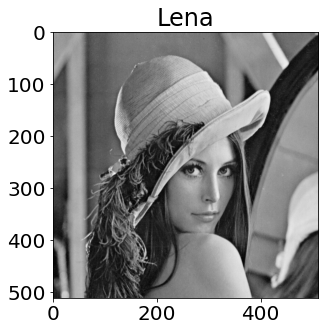

Tipo de Dado: <class 'numpy.ndarray'>
Resolução: (512, 512)
Tamanho: 262144 px


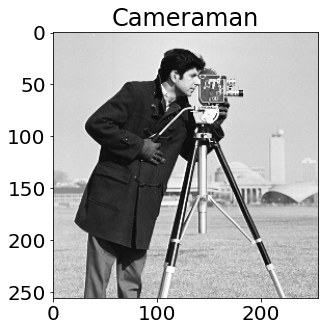

Tipo de Dado: <class 'numpy.ndarray'>
Resolução: (256, 256)
Tamanho: 65536 px


In [ ]:
lena = io.imread('https://www.cosy.sbg.ac.at/~pmeerw/Watermarking/lena_gray.gif')
plt.imshow(lena,cmap='gray')
plt.title("Lena")
plt.show()
print("Tipo de Dado:",type(lena))
print("Resolução:",lena.shape)
print("Tamanho:", lena.size,"px")

cameraman = io.imread('https://i.ibb.co/RYt2N9y/cman.png')
plt.imshow(cameraman,cmap='gray')
plt.title("Cameraman")
plt.show()
print("Tipo de Dado:",type(cameraman))
print("Resolução:",cameraman.shape)
print("Tamanho:", cameraman.size,"px")

Loop de 10% até 100% dos Componentes

In [ ]:
LENA_DATA = np.zeros((10,3)) #Inicializando vetor de dados

i=0
for x in range(10,110,10):
  components = int(512*(x/100)) # X% do maximo de componentes (512)
  pca = PCA(components)
  lena_compressed = pca.inverse_transform(pca.fit_transform(lena))
  LENA_DATA[i,0] = mean_squared_error(lena,lena_compressed) #MSE
  LENA_DATA[i,1] = lena.shape[0]/components #CR
  LENA_DATA[i,2] = np.cumsum(pca.explained_variance_ratio_*100)[-1] #CUMMULATIVE VARIANCE
  i += 1

Mostrando a Tabela de Resultados

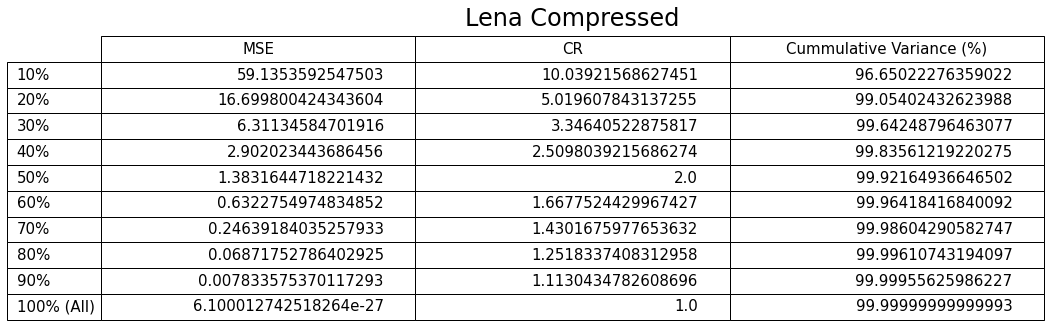

In [ ]:
fig,ax = plt.subplots(1,1)
plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 20})
plt.title("Lena Compressed")
column_labels=["MSE", "CR", "Cummulative Variance (%)"]
df=pd.DataFrame(LENA_DATA,columns=column_labels)
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["10%","20%","30%","40%","50%","60%","70%","80%","90%","100% (All)"],loc="center")
the_table.auto_set_font_size(False)
the_table.set_fontsize(15)
the_table.scale(1,2)

plt.show()

In [ ]:
CAMERAMAN_DATA = np.zeros((10,3)) #Inicializando vetor de dados

i=0
for x in range(10,110,10):
  components = int(256*(x/100)) # X% do maximo de componentes (512)
  pca2 = PCA(components)
  cameraman_compressed = pca2.inverse_transform(pca2.fit_transform(cameraman))
  CAMERAMAN_DATA[i,0] = mean_squared_error(cameraman,cameraman_compressed) #MSE
  CAMERAMAN_DATA[i,1] = cameraman.shape[0]/components #CR
  CAMERAMAN_DATA[i,2] = np.cumsum(pca2.explained_variance_ratio_*100)[-1] #CUMMULATIVE VARIANCE
  i += 1

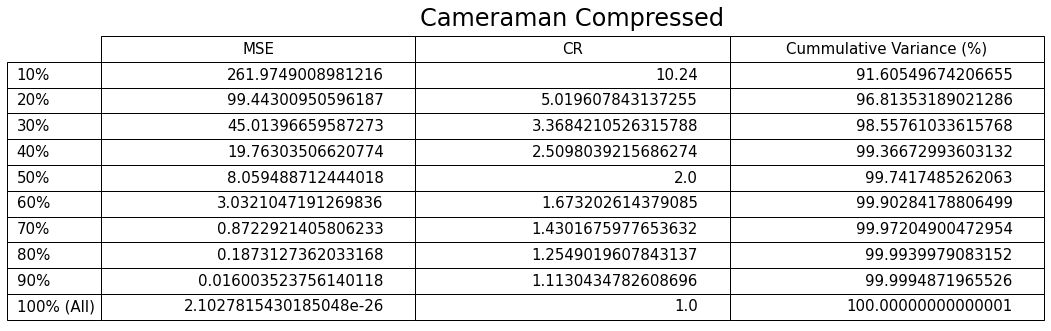

In [ ]:
fig,ax = plt.subplots(1,1)
plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 20})
plt.title("Cameraman Compressed")
column_labels=["MSE", "CR", "Cummulative Variance (%)"]
df=pd.DataFrame(CAMERAMAN_DATA,columns=column_labels)
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["10%","20%","30%","40%","50%","60%","70%","80%","90%","100% (All)"],loc="center")
the_table.auto_set_font_size(False)
the_table.set_fontsize(15)
the_table.scale(1,2)

plt.show()

#**4.3 - Data Visualization Experiment - GJBaratto**

## Reduzindo número labels

### Truncando EAR

In [ ]:
menores_que_5 = []
for i in range(0,EAR_y.shape[0]):
  if EAR_y[i] < 5:
    menores_que_5.append(True);
  else:
    menores_que_5.append(False)
tEAR_y = EAR_y[menores_que_5]
tEAR_X = EAR_X[menores_que_5]
# print(tEAR_X.shape, tEAR_y.shape)

### Truncando ORL

In [ ]:
menores_que_5 = []
for i in range(0,ORL_y.shape[0]):
  if ORL_y[i] < 6:
    menores_que_5.append(True);
  else:
    menores_que_5.append(False)
tORL_y = ORL_y[menores_que_5]
tORL_X = ORL_X[menores_que_5]
# print(tORL_X.shape, tORL_y.shape)

### Truncando YALE

In [ ]:
menores_que_5 = []
for i in range(0,YALE_y.shape[0]):
  if YALE_y[i] < 6:
    menores_que_5.append(True);
  else:
    menores_que_5.append(False)
tYALE_y = YALE_y[menores_que_5]
tYALE_X = YALE_X[menores_que_5]
# print(tYALE_X.shape, tYALE_y.shape)

### Conferindo novas dimensões dos datasets

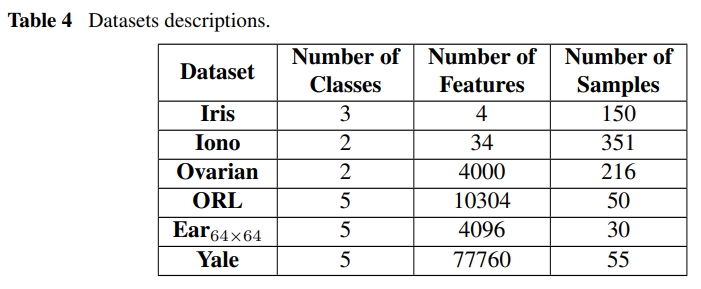

In [ ]:
print(np.unique(iris_y).shape,iris_X.shape)
print(np.unique(iono_y).shape,iono_X.shape)
print(np.unique(tORL_y).shape,tORL_X.shape)
print(np.unique(tEAR_y).shape,tEAR_X.shape)
print(np.unique(tYALE_y).shape,tYALE_X.shape)

(3,) (150, 4)
(2,) (351, 34)
(5,) (50, 5600)
(5,) (30, 4096)
(5,) (55, 77760)


## Aplicação do PCA

### Iris

In [ ]:
IRIS_DATA = np.zeros(4) #Inicializando vetor de dados

i=0
for components in range(2,4):
  pca = PCA(components)
  iris_X_rdc = pca.fit_transform(iris_X)
  iris_X_rcp = pca.inverse_transform(iris_X_rdc)
  IRIS_DATA[(i-2)*2+0] = np.cumsum(pca.explained_variance_ratio_*100)[-1]
  IRIS_DATA[(i-2)*2+1] = mean_squared_error(iris_X,iris_X_rcp) #MSE
  i += 1
print(IRIS_DATA)

[9.77685206e+01 2.53410739e-02 9.94787816e+01 5.91904809e-03]


### Iono

In [ ]:
IONO_DATA = np.zeros(4) #Inicializando vetor de dados

i=0
for components in range(2,4):
  pca = PCA(components)
  iono_X_rdc = pca.fit_transform(iono_X)
  iono_X_rcp = pca.inverse_transform(iono_X_rdc)
  IONO_DATA[(i-2)*2+0] = np.cumsum(pca.explained_variance_ratio_*100)[-1]
  IONO_DATA[(i-2)*2+1] = mean_squared_error(iono_X,iono_X_rcp) #MSE
  i += 1
print(IONO_DATA)

[43.61584829  0.15322575 51.09116417  0.13291134]


### ORL

In [ ]:
ORL_DATA = np.zeros(4) #Inicializando vetor de dados

i=0
for components in range(2,4):
  pca = PCA(components)
  tORL_X_rdc = pca.fit_transform(tORL_X)
  tORL_X_rcp = pca.inverse_transform(tORL_X_rdc)
  ORL_DATA[(i-2)*2+0] = np.cumsum(pca.explained_variance_ratio_*100)[-1]
  ORL_DATA[(i-2)*2+1] = mean_squared_error(tORL_X,tORL_X_rcp) #MSE
  i += 1
print(ORL_DATA)

[ 36.18722674 687.85107851  49.85181624 540.5576427 ]


### EAR

In [ ]:
EAR_DATA = np.zeros(4) #Inicializando vetor de dados

i=0
for components in range(2,4):
  pca = PCA(components)
  tEAR_X_rdc = pca.fit_transform(tEAR_X)
  tEAR_X_rcp = pca.inverse_transform(tEAR_X_rdc)
  EAR_DATA[(i-2)*2+0] = np.cumsum(pca.explained_variance_ratio_*100)[-1]
  EAR_DATA[(i-2)*2+1] = mean_squared_error(tEAR_X,tEAR_X_rcp) #MSE
  i += 1
print(EAR_DATA)

[ 51.92625455 222.26471248  69.19346401 142.43129592]


### YALE

In [ ]:
YALE_DATA = np.zeros(4) #Inicializando vetor de dados

i=0
for components in range(2,4):
  pca = PCA(components)
  tYALE_X_rdc = pca.fit_transform(tYALE_X)
  tYALE_X_rcp = pca.inverse_transform(tYALE_X_rdc)
  YALE_DATA[(i-2)*2+0] = np.cumsum(pca.explained_variance_ratio_*100)[-1]
  YALE_DATA[(i-2)*2+1] = mean_squared_error(tYALE_X,tYALE_X_rcp) #MSE
  i += 1
print(YALE_DATA)

[  52.71995341 1578.59220828   64.9683433  1169.6414089 ]


## Exibindo os resultados

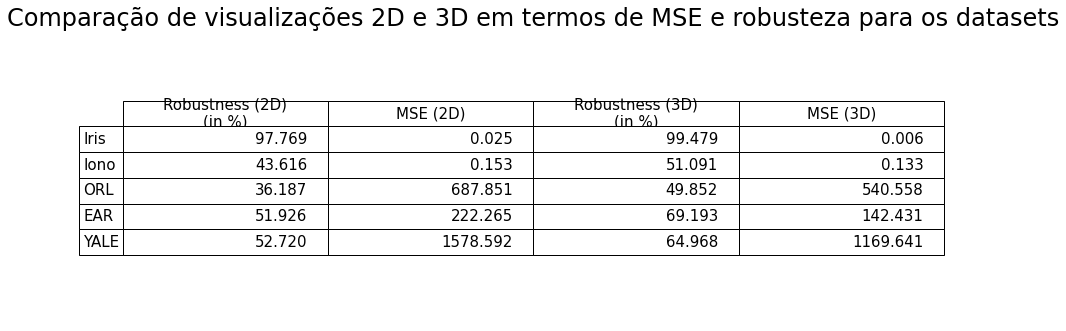

In [ ]:
RAW_DATA = [IRIS_DATA, IONO_DATA, ORL_DATA, EAR_DATA, YALE_DATA]

fig,ax = plt.subplots(1,1)
plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 20})
plt.title("Comparação de visualizações 2D e 3D em termos de MSE e robusteza para os datasets")
column_labels=["Robustness (2D)\n(in %)", "MSE (2D)", "Robustness (3D)\n(in %)", "MSE (3D)"]
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
FORMATED_DATA = [['%.3f' % j for j in i] for i in RAW_DATA]
df=pd.DataFrame(FORMATED_DATA,columns=column_labels)
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.values,colLabels=df.columns,rowLabels=["Iris", "Iono", "ORL", "EAR", "YALE"],loc="center")
the_table.auto_set_font_size(False)
the_table.set_fontsize(15)
the_table.scale(1,2)

plt.show()

Resultados esperados:

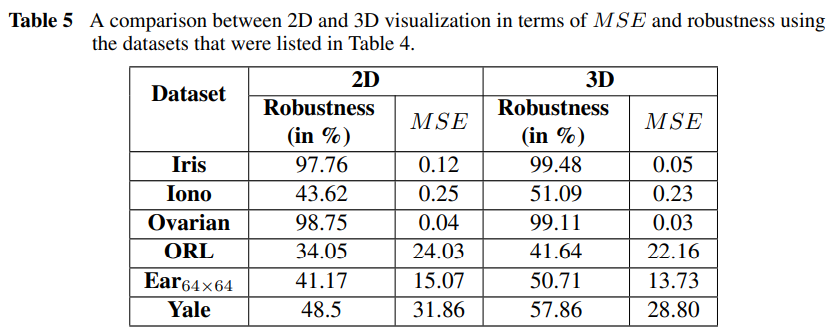

## Visualizando os planos 2D e 3D

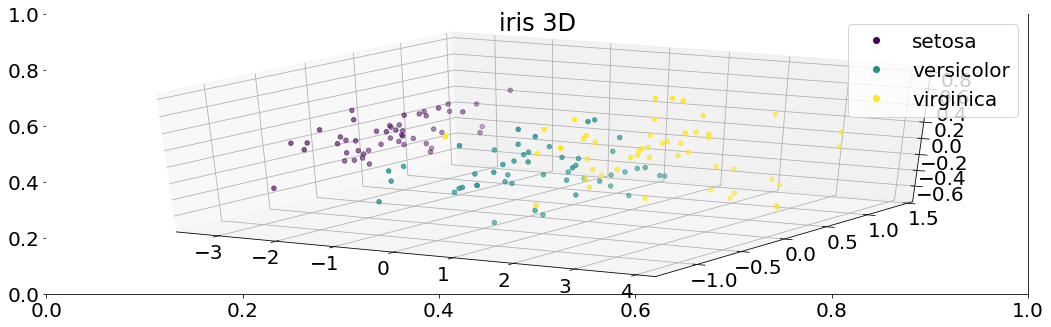

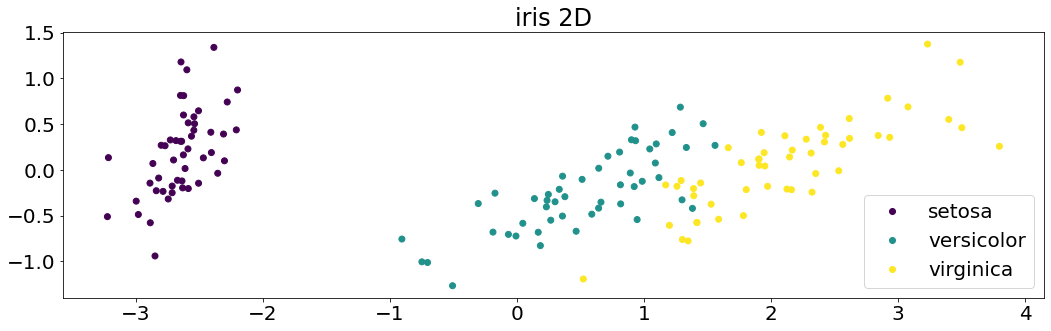

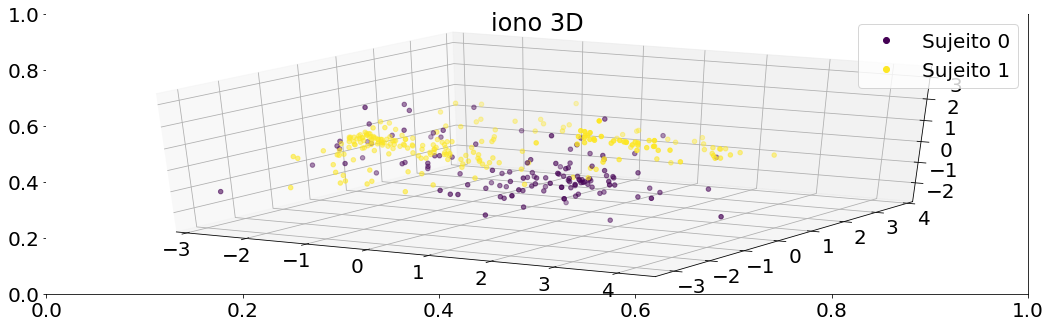

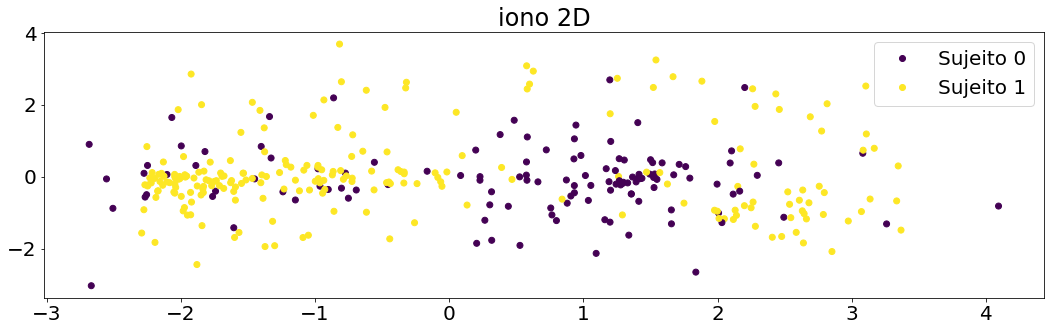

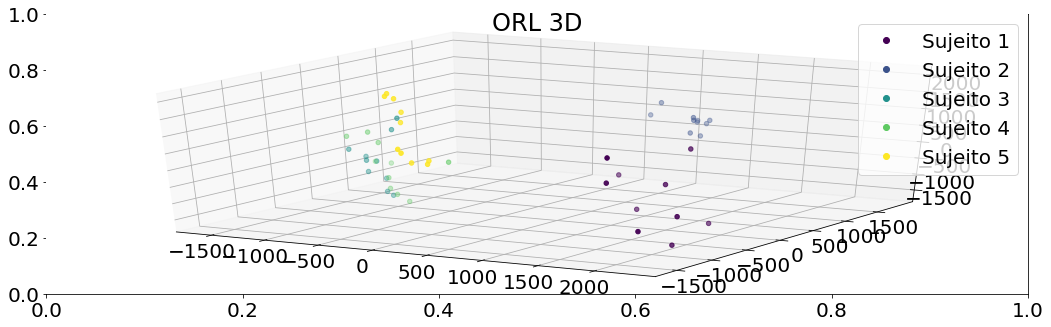

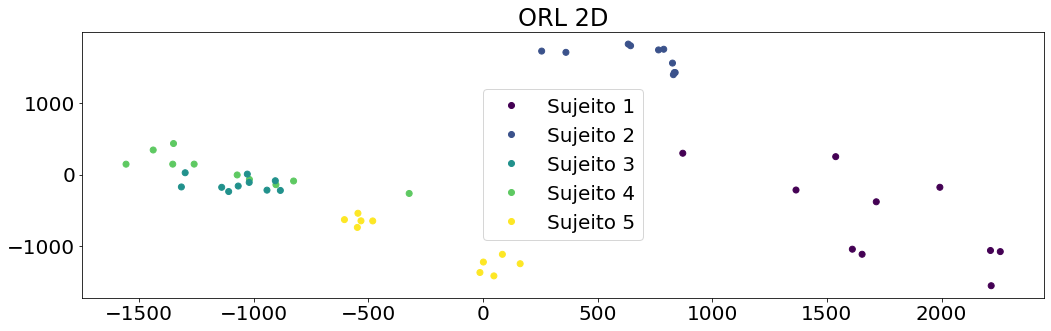

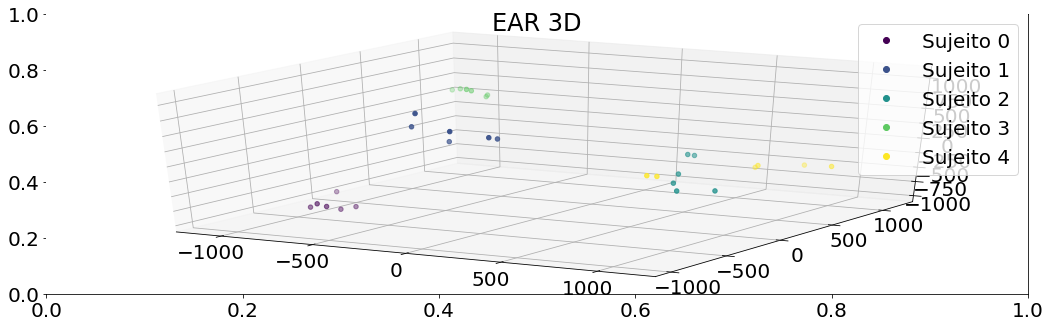

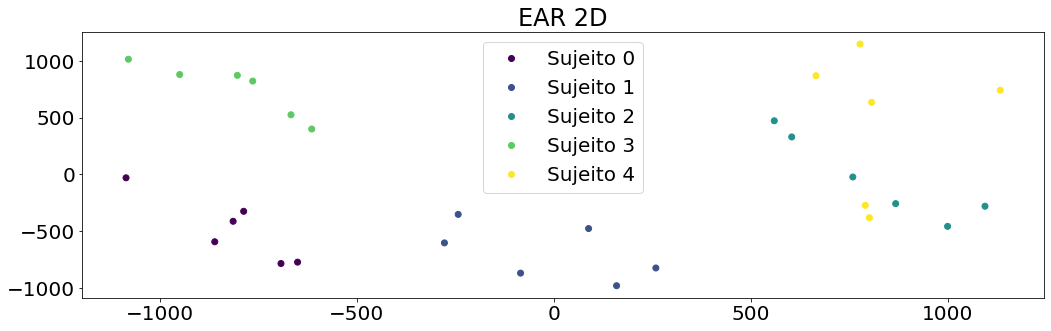

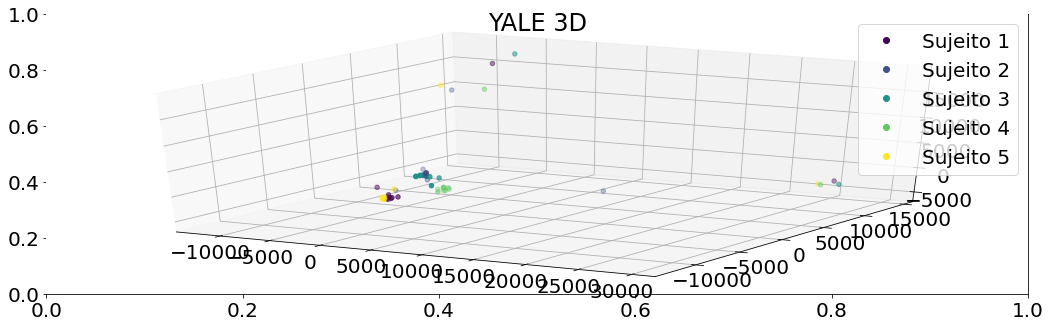

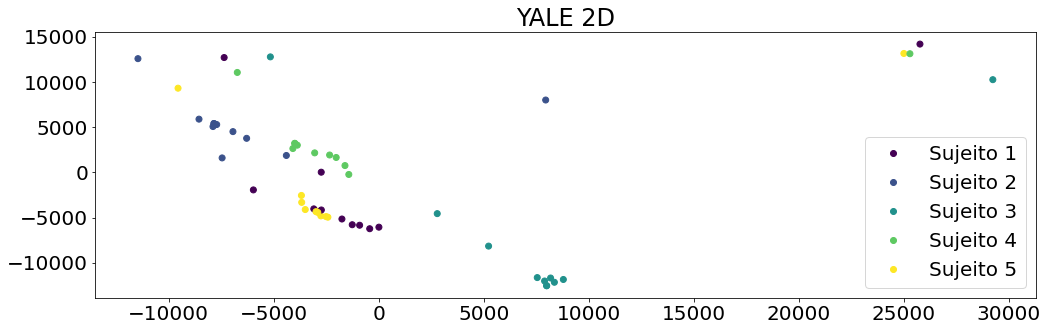

In [ ]:
X_rdc = [iris_X_rdc,
         iono_X_rdc,
         tORL_X_rdc,
         tEAR_X_rdc,
         tYALE_X_rdc]
y = [iris_y,
     iono_y,
     tORL_y,
     tEAR_y,
     tYALE_y]
i=0
label=[]
for each in y:
  aux = []
  for one in np.unique(each):
    aux.append('Sujeito '+str(one))
  label.append(aux)
  i+=1
label[0]=list(iris.target_names)

title = ['iris', 'iono', 'ORL', 'EAR', 'YALE']

for i in range(5):
  fig, ax = plt.subplots(1,1)
  ax = fig.add_subplot(projection='3d')
  plot = ax.scatter(X_rdc[i][:,0], X_rdc[i][:,1], X_rdc[i][:,2], c=y[i])
  plt.legend(handles=plot.legend_elements()[0], labels=label[i])
  plt.title(title[i]+' 3D')
  plt.show()

  plot = plt.scatter(X_rdc[i][:,0], X_rdc[i][:,1], c=y[i])
  plt.legend(handles=plot.legend_elements()[0], labels=label[i])
  plt.title(title[i]+' 2D')
  plt.show(plot)